In [1]:
# Importing essential libraries
import numpy as np
import pandas as pd
import pickle
import joblib
import os
from sklearn.preprocessing import StandardScaler

In [2]:
# Loading the dataset
df = pd.read_excel('dataset/kaggle_zozoaa.xlsx')

In [3]:
import warnings

warnings.filterwarnings('ignore')

# Converting data 

In [4]:
# Returns number of rows and columns of the dataset
df.shape

(32, 11)

In [5]:
# Returns an object with all of the column headers
df.columns

Index(['nama', 'favorite_bahan', 'gender', 'numerized', 'umur', 'ordered',
       'alamat', 'rasa', 'occupation', 'fave_drink', 'menu_ordered'],
      dtype='object')

In [6]:
# Returns different datatypes for 'each columns' (float, int, string, bool, etc.)
df.dtypes

nama              object
favorite_bahan     int64
gender            object
numerized          int64
umur               int64
ordered            int64
alamat             int64
rasa               int64
occupation         int64
fave_drink         int64
menu_ordered       int64
dtype: object

In [7]:
# Returns the first x number of rows when head(num). Without a number it returns 5
df.head(1)

columns_to_drop = ['nama','gender']  # List of unnecessary column names
df.drop(columns_to_drop, axis=1, inplace=True)

In [8]:
# Returns basic statistics on numeric column
df.describe()

,favorite_bahan,numerized,umur,ordered,alamat,rasa,occupation,fave_drink,menu_ordered
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,1.250000,5.906250,3.875000,40.000000,12.281250,16.250000,18.593750,20.250000,24.812500
std,0.439941,4.343028,0.941858,17.597654,1.442095,0.439941,0.498991,0.439941,1.029798
min,1.000000,0.000000,3.000000,10.000000,11.000000,16.000000,18.000000,20.000000,22.000000
25%,1.000000,0.000000,3.000000,40.000000,11.000000,16.000000,18.000000,20.000000,24.750000
50%,1.000000,9.000000,4.000000,50.000000,12.000000,16.000000,19.000000,20.000000,25.000000
75%,1.250000,9.000000,5.000000,50.000000,13.250000,16.250000,19.000000,20.250000,25.000000
max,2.000000,9.000000,6.000000,50.000000,15.000000,17.000000,19.000000,21.000000,26.000000


In [9]:
# Returns true for a column having null values, else false
df.isnull().any()

favorite_bahan    False
numerized         False
umur              False
ordered           False
alamat            False
rasa              False
occupation        False
fave_drink        False
menu_ordered      False
dtype: bool

In [10]:
df = df.rename(columns={'DiabetesPedigreeFunction':'DPF'})
df.head()

,favorite_bahan,numerized,umur,ordered,alamat,rasa,occupation,fave_drink,menu_ordered
0,1,0,4,50,11,16,19,20,26
1,1,9,3,50,12,16,18,20,25
2,1,9,3,50,11,16,18,20,26
3,1,0,3,50,12,16,19,20,26
4,2,9,5,10,15,17,19,21,24


In [11]:
# Importing essential libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
# %matploblib inline

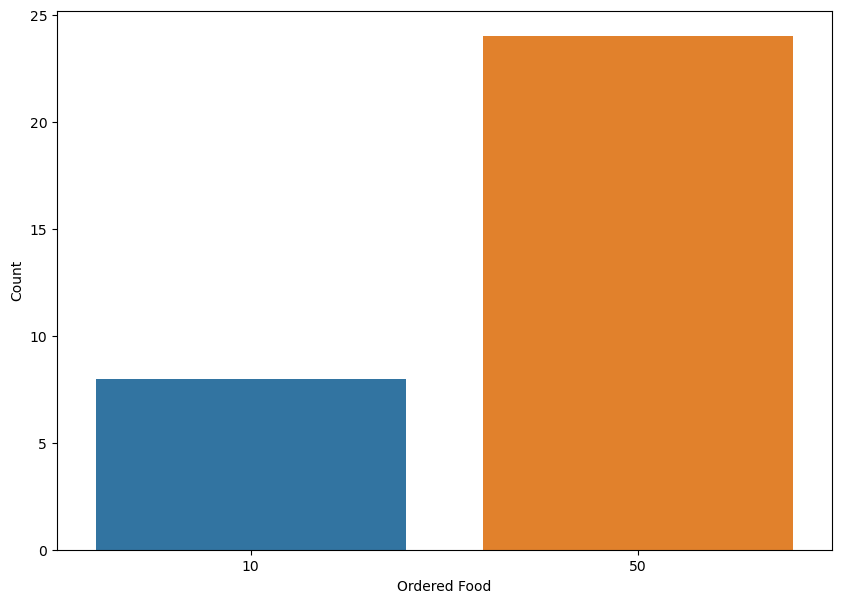

In [12]:
# Plotting the Outcomes based on the number of dataset entries
plt.figure(figsize=(10,7))
sns.countplot(x='ordered', data=df)

# Headings
plt.xlabel('Ordered Food')
plt.ylabel('Count')

plt.show()

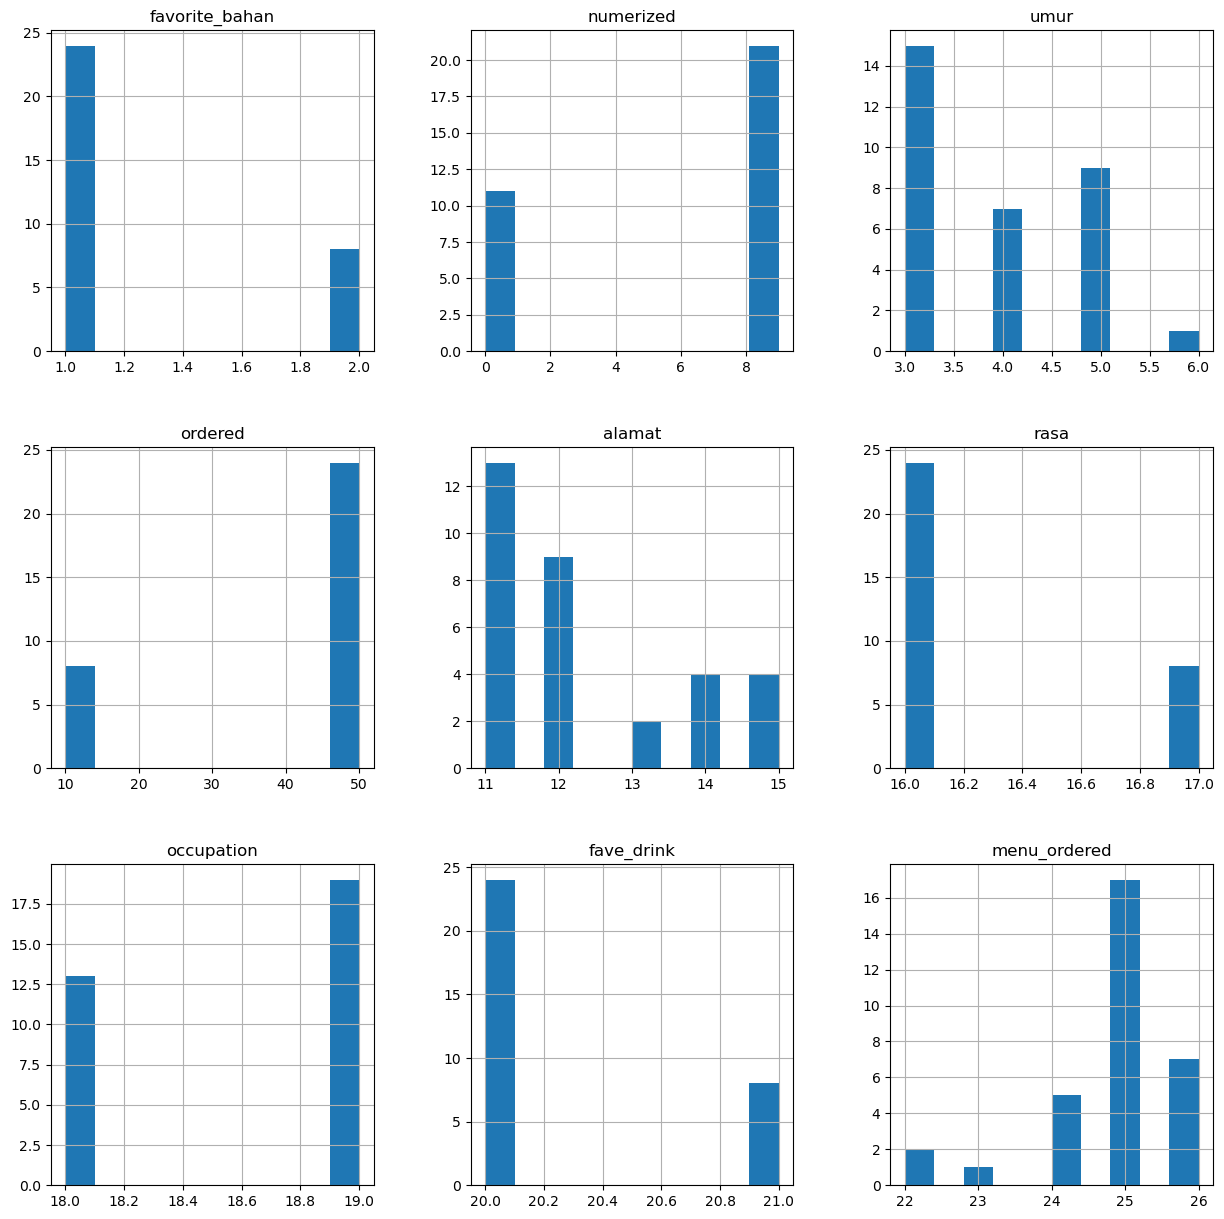

In [13]:
# To fill these Nan values the data distribution needs to be understood
# Plotting histogram of dataset before replacing NaN values
p = df.hist(figsize = (15,15))

In [14]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X = df.drop(columns='ordered')
y = df['ordered']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((25, 8), (7, 8))

In [16]:
import numpy as np

# Reshape y_train to match the shape of X_train
y_train = np.ravel(y_train)

# Reshape y_test to match the shape of X_test
y_test = np.ravel(y_test)

# Feature Engineering

In [17]:
# check data types in X_train

X_train.dtypes

favorite_bahan    int64
numerized         int64
umur              int64
alamat            int64
rasa              int64
occupation        int64
fave_drink        int64
menu_ordered      int64
dtype: object

In [18]:
# check missing values in numerical variables in X_train

X_train.isnull().sum()

favorite_bahan    0
numerized         0
umur              0
alamat            0
rasa              0
occupation        0
fave_drink        0
menu_ordered      0
dtype: int64

In [19]:
# check missing values in numerical variables in X_test

X_test.isnull().sum()

favorite_bahan    0
numerized         0
umur              0
alamat            0
rasa              0
occupation        0
fave_drink        0
menu_ordered      0
dtype: int64

In [20]:
# print percentage of missing values in the numerical variables in training set

for col in X_train.columns:
    if X_train[col].isnull().mean()>0:
        print(col, round(X_train[col].isnull().mean(),4))

In [21]:
X_train.isnull().sum() 

favorite_bahan    0
numerized         0
umur              0
alamat            0
rasa              0
occupation        0
fave_drink        0
menu_ordered      0
dtype: int64

In [22]:
# check missing values in numerical variables in X_test

X_test.isnull().sum()

favorite_bahan    0
numerized         0
umur              0
alamat            0
rasa              0
occupation        0
fave_drink        0
menu_ordered      0
dtype: int64

In [23]:
X_train.head()

,favorite_bahan,numerized,umur,alamat,rasa,occupation,fave_drink,menu_ordered
25,1,9,5,14,16,19,20,25
12,2,0,3,11,17,18,21,22
0,1,0,4,11,16,19,20,26
4,2,9,5,15,17,19,21,24
16,2,9,5,13,17,19,21,24


In [24]:
X_test.head()

,favorite_bahan,numerized,umur,alamat,rasa,occupation,fave_drink,menu_ordered
29,1,0,3,12,16,18,20,25
15,1,9,3,12,16,18,20,25
24,1,9,4,14,16,19,20,25
17,1,9,5,13,16,19,20,25
8,1,9,3,11,16,19,20,25


# Feature Scaling

In [25]:
print(X_train)
print(X_test)

    favorite_bahan  numerized  umur  alamat  rasa  occupation  fave_drink  \
25               1          9     5      14    16          19          20   
12               2          0     3      11    17          18          21   
0                1          0     4      11    16          19          20   
4                2          9     5      15    17          19          21   
16               2          9     5      13    17          19          21   
5                1          9     4      14    16          19          20   
13               1          0     4      11    16          19          20   
11               1          9     5      11    16          19          20   
23               1          9     4      11    16          19          20   
1                1          9     3      12    16          18          20   
2                1          9     3      11    16          18          20   
26               2          0     5      12    17          19          21   

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [27]:
column_names = ['favorite_bahan', 'umur', 'ordered', 'alamat', 'rasa', 'occupation','fave_drink','menu_ordered']
X_train = pd.DataFrame(X_train, columns=column_names)

In [28]:
column_names = ['favorite_bahan', 'umur', 'ordered', 'alamat', 'rasa', 'occupation','fave_drink','menu_ordered']
X_test = pd.DataFrame(X_train, columns=column_names)

In [29]:
X_train.head()

,favorite_bahan,umur,ordered,alamat,rasa,occupation,fave_drink,menu_ordered
0,-0.685994,0.750000,1.155493,1.108338,-0.685994,0.816497,-0.685994,0.251285
1,1.457738,-1.333333,-0.984309,-0.870837,1.457738,-1.224745,1.457738,-2.441058
2,-0.685994,-1.333333,0.085592,-0.870837,-0.685994,0.816497,-0.685994,1.148733
3,1.457738,0.750000,1.155493,1.768062,1.457738,0.816497,1.457738,-0.646162
4,1.457738,0.750000,1.155493,0.448613,1.457738,0.816497,1.457738,-0.646162


# Fit K Neighbours Classifier to the training set 

In [30]:
# import KNeighbors ClaSSifier from sklearn
from sklearn.neighbors import KNeighborsClassifier


# instantiate the model
knn = KNeighborsClassifier(n_neighbors=3)


# fit the model to the training set
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

# Predict test-set results

In [31]:
y_pred = knn.predict(X_test)

y_pred

array([50, 10, 50, 10, 10, 50, 50, 50, 50, 50, 50, 10, 50, 50, 50, 50, 10,
       50, 50, 10, 50, 50, 10, 50, 10], dtype=int64)

In [32]:
# probability of getting output as 2 - benign cancer

knn.predict_proba(X_test)[:,0]

array([0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 1., 0., 1.])

In [33]:
# probability of getting output as 4 - malignant cancer

knn.predict_proba(X_test)[:,1]

array([1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 0., 1., 1., 0., 1., 0.])

# Check accuracy score

In [34]:
# Assuming y_test and y_pred have different shapes
y_test = np.array([0, 1, 0, 1, 0, 1, 0])  # Shape: (7,)
y_pred = np.array([0, 1, 1, 1, 0, 1, 0])  # Shape: (7,)

In [35]:
from sklearn.metrics import accuracy_score

# Assuming you have the model predictions in y_pred
accuracy = accuracy_score(y_test, y_pred)

print("Model accuracy score: {:.4f}".format(accuracy))

Model accuracy score: 0.8571


In [36]:
y_pred_train = knn.predict(X_train)

In [37]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 1.0000


In [38]:
y_test = np.reshape(y_test, (-1, 1))

In [39]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (25, 8)
y_train shape: (25,)
X_test shape: (25, 8)
y_test shape: (7, 1)


In [40]:
model = KNeighborsClassifier()
model_name = "FoodClassifier"

In [41]:
model.fit(X_train, y_train)

KNeighborsClassifier()

In [42]:
print("FoodClassifier:", model_name)

FoodClassifier: FoodClassifier


In [43]:
filename= 'food_pred_models.pkl'
pickle.dump(model,open(filename,'wb'))

In [44]:
pred_result = model.predict(X_test)
print(pred_result)

[50 10 50 10 10 50 50 50 50 50 50 10 50 50 50 50 10 50 50 10 50 50 10 50
 10]


In [45]:
loaded_model = pickle.load(open(filename,'rb'))
loaded_model.predict(X_test)

array([50, 10, 50, 10, 10, 50, 50, 50, 50, 50, 50, 10, 50, 50, 50, 50, 10,
       50, 50, 10, 50, 50, 10, 50, 10], dtype=int64)

# Check for overfitting and underfitting

In [46]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))

Training set score: 1.0000


ValueError: Found input variables with inconsistent numbers of samples: [7, 25]

In [ ]:
# check class distribution in test set

y_test.value_counts()

In [ ]:
# check null accuracy score

null_accuracy = (85/(85+55))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))